In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/orl-faces/ORL_faces.npz


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

In [3]:
data = np.load('../input/orl-faces/ORL_faces.npz')

x_train = data['trainX']
y_train = data['trainY']
x_test = data['testX']
y_test = data['testY']

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val= train_test_split(x_train, y_train, test_size=0.20, random_state=25,)

x_train = np.array(x_train,dtype='float32')/255
x_val = np.array(x_val,dtype='float32')/255
x_test = np.array(x_test,dtype='float32')/255

x_train = x_train.reshape(x_train.shape[0], 112, 92, 1)
x_val = x_val.reshape(x_val.shape[0], 112, 92, 1)
x_test = x_test.reshape(x_test.shape[0], 112, 92, 1)

In [5]:
cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= (112,92,1)),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= (112,92,1)),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='softmax')                   #20 is the number of outputs
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

2022-10-17 06:57:30.839814: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=100, verbose=2,
    validation_data=(np.array(x_val),np.array(y_val)),
)

2022-10-17 06:57:31.339172: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
1/1 - 3s - loss: 3.0104 - accuracy: 0.0260 - val_loss: 3.0976 - val_accuracy: 0.0208
Epoch 2/100
1/1 - 2s - loss: 3.1914 - accuracy: 0.0677 - val_loss: 2.9853 - val_accuracy: 0.0208
Epoch 3/100
1/1 - 2s - loss: 3.0310 - accuracy: 0.0625 - val_loss: 2.9945 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 - 2s - loss: 2.9958 - accuracy: 0.0781 - val_loss: 2.9915 - val_accuracy: 0.0625
Epoch 5/100
1/1 - 2s - loss: 2.9856 - accuracy: 0.0885 - val_loss: 2.9880 - val_accuracy: 0.0417
Epoch 6/100
1/1 - 2s - loss: 2.9742 - accuracy: 0.0833 - val_loss: 2.9850 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 - 2s - loss: 2.9432 - accuracy: 0.0833 - val_loss: 2.9868 - val_accuracy: 0.0000e+00
Epoch 8/100
1/1 - 2s - loss: 2.9375 - accuracy: 0.0885 - val_loss: 2.9505 - val_accuracy: 0.1667
Epoch 9/100
1/1 - 2s - loss: 2.8855 - accuracy: 0.1354 - val_loss: 2.9229 - val_accuracy: 0.1667
Epoch 10/100
1/1 - 2s - loss: 2.8246 - accuracy: 0.1875 - val_loss: 2.9335 - val_accuracy: 0.1458
Epoch 11/100
1/1 

In [7]:
test_scor = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test los {:.4f}'.format(test_scor[0]))
print('test acc {:.4f}'.format(test_scor[1]))

test los 0.6262
test acc 0.9000


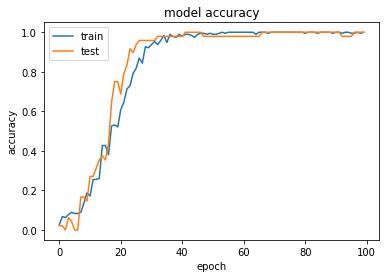

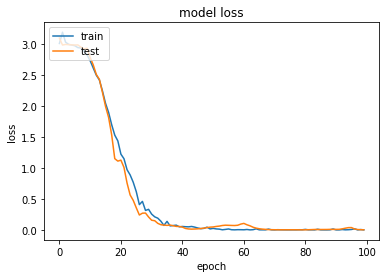

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()